# Extracccion de datos

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
import pandas as pd

# List of columns that contain nested dictionaries
nested_cols = ['customer', 'phone', 'internet', 'account']

# Create a copy of the original DataFrame to work with
df_flat = df.copy()

# Iterate through each nested column and flatten it
for col in nested_cols:
    # Normalize the nested JSON data into a new DataFrame
    # The 'record_prefix' helps to avoid column name clashes by adding a prefix to the new columns
    df_normalized = pd.json_normalize(df_flat[col], sep='_')

    # Drop the original nested column from the main DataFrame
    df_flat = df_flat.drop(columns=[col])

    # Join the normalized DataFrame with the main DataFrame
    df_flat = pd.concat([df_flat, df_normalized], axis=1)

# Display the first few rows of the flattened DataFrame
display(df_flat.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
## En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

### Analysis of Numerical Features vs. Churn

In [6]:
# Remove rows where 'Churn' is an empty string
df_flat_cleaned = df_flat[df_flat['Churn'] != ''].copy()

### Updated Churn Distribution after Cleaning

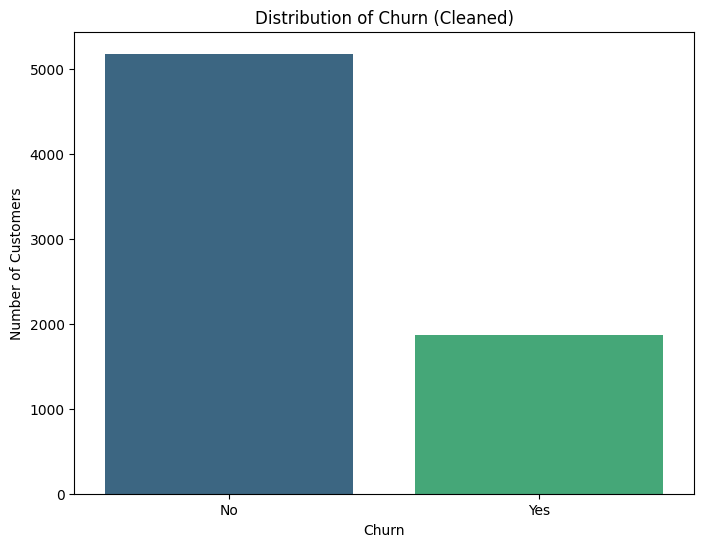

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts_cleaned = df_flat_cleaned['Churn'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts_cleaned.index, y=churn_counts_cleaned.values, hue=churn_counts_cleaned.index, palette='viridis', legend=False)
plt.title('Distribution of Churn (Cleaned)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

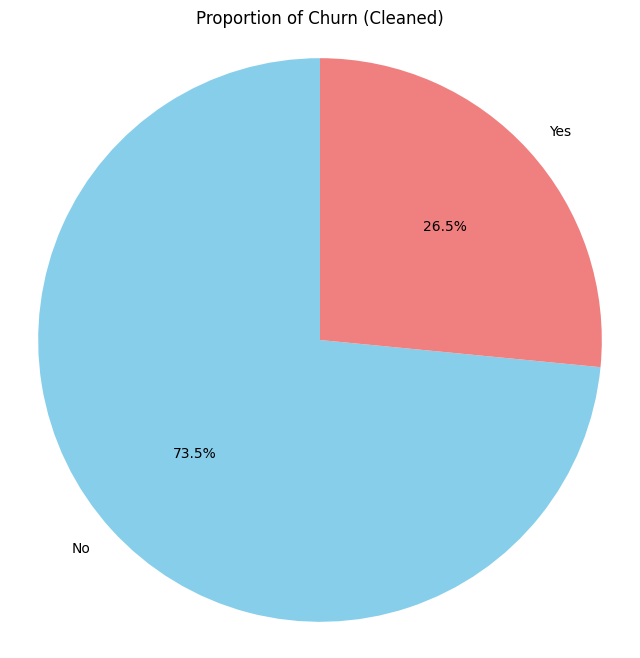

In [8]:
plt.figure(figsize=(8, 8))
plt.pie(churn_counts_cleaned, labels=churn_counts_cleaned.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Churn (Cleaned)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

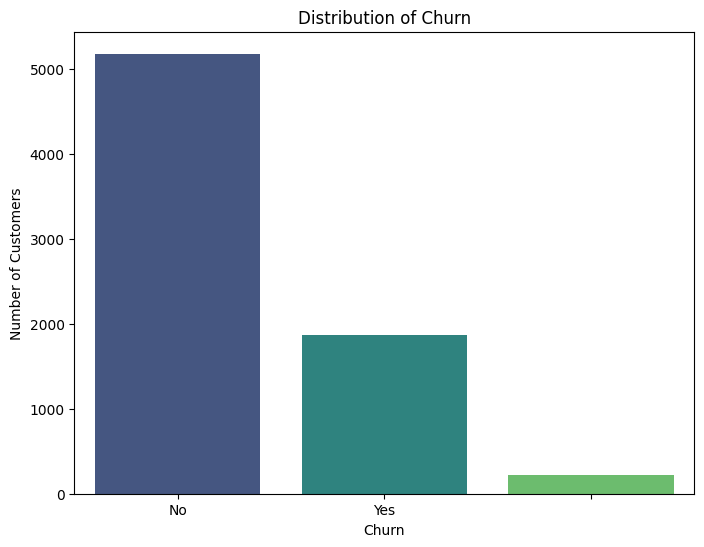

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df_flat['Churn'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

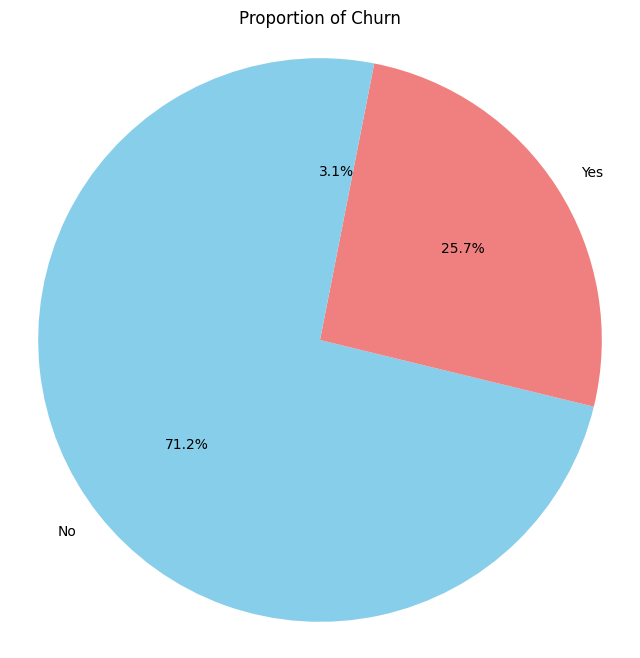

In [4]:
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Churn')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/tmp/ipython-input-2014981261.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


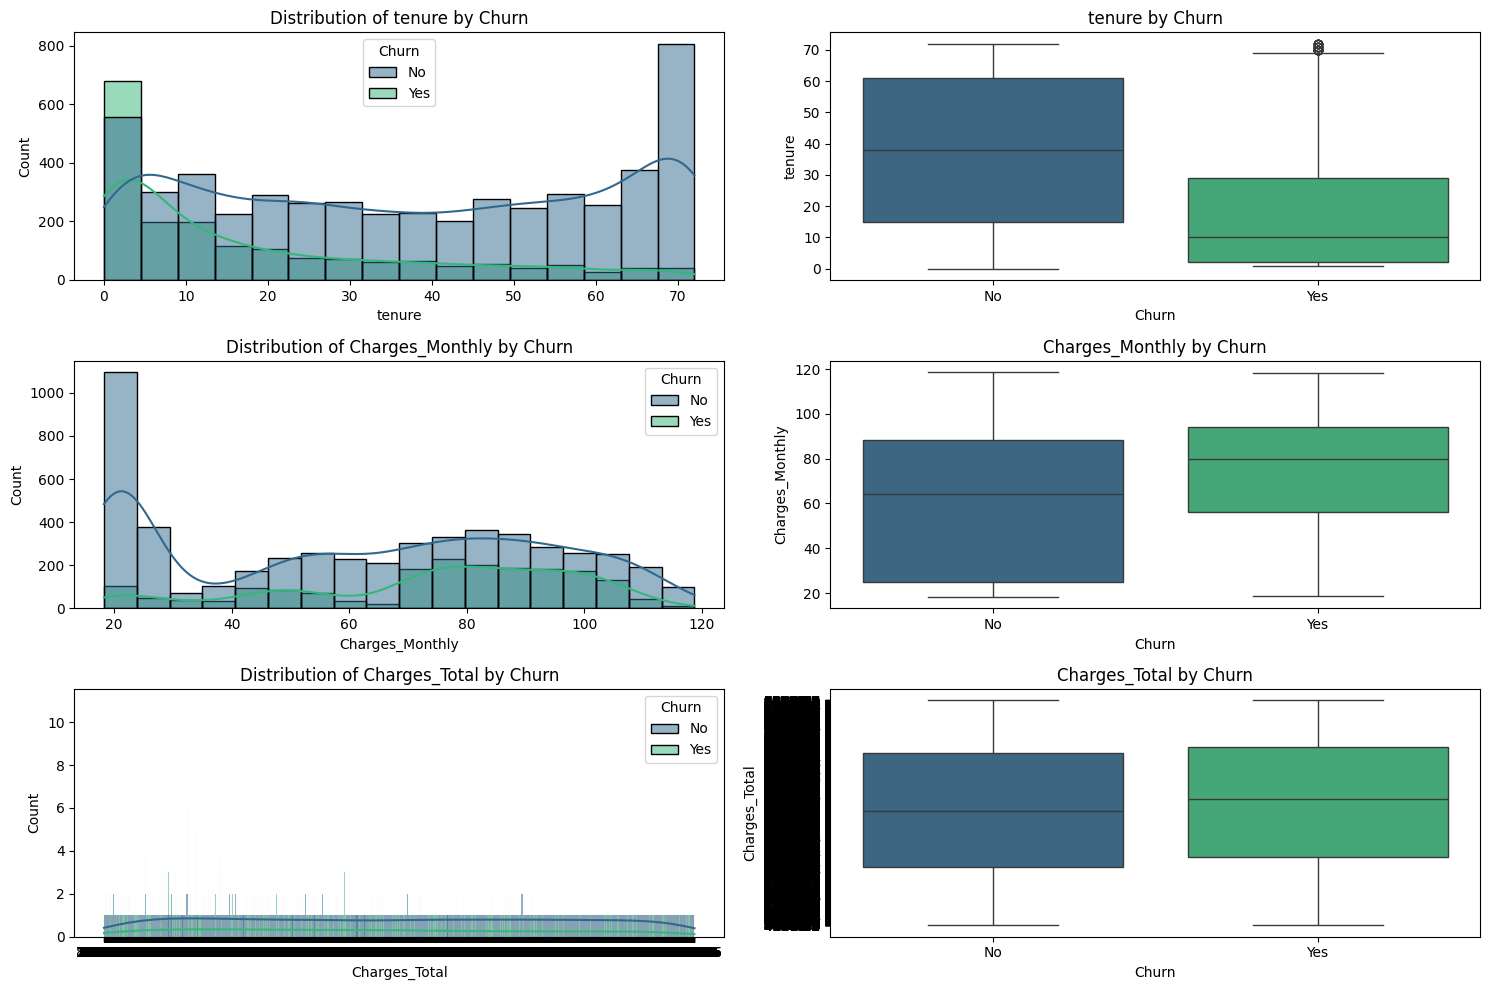

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['tenure', 'Charges_Monthly', 'Charges_Total']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2*i + 1) # Histogram
    sns.histplot(data=df_flat_cleaned, x=col, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Distribution of {col} by Churn')

    plt.subplot(len(numerical_cols), 2, 2*i + 2) # Box Plot
    sns.boxplot(data=df_flat_cleaned, x='Churn', y=col, hue='Churn', palette='viridis', legend=False)
    plt.title(f'{col} by Churn')

plt.tight_layout()
plt.show()

### Analysis of Categorical Features vs. Churn

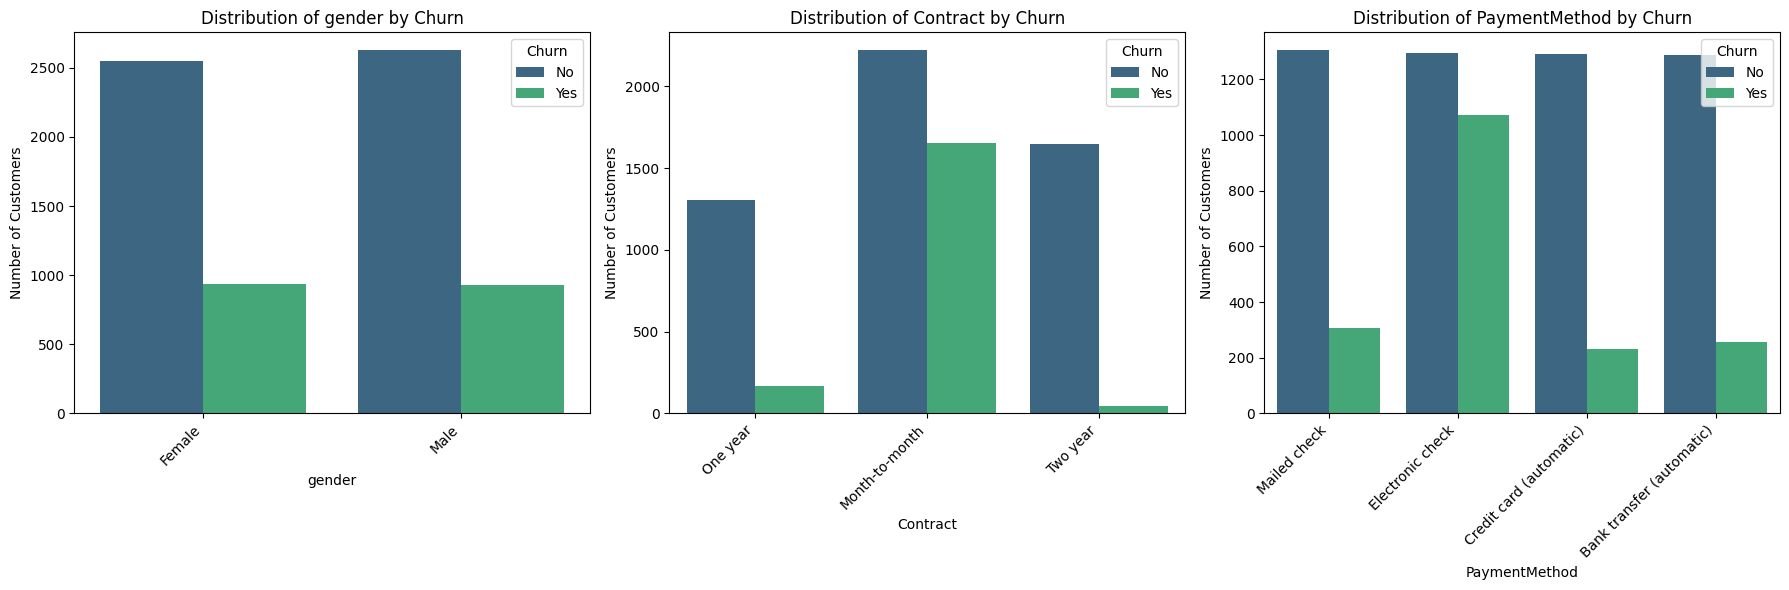

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'Contract', 'PaymentMethod']

plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.countplot(data=df_flat_cleaned, x=col, hue='Churn', palette='viridis')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout()
plt.show()

#Informe Final

Basándote en el análisis de los factores que impulsan la pérdida de clientes (churn), incluyendo variables numéricas como 'tenure' (antigüedad) y 'Charges_Monthly' (cargos mensuales), y variables categóricas como 'Contract' (contrato) y 'PaymentMethod' (método de pago), resume los hallazgos clave. Posteriormente, propón estrategias accionables para reducir la fuga de clientes, abordando específicamente:

La mayor tasa de rotación entre los clientes con contrato 'Month-to-month' (mes a mes).

El aumento en la fuga observado con el método de pago 'Electronic check' (cheque electrónico).

La tendencia de los clientes nuevos ('tenure' bajo) a abandonar el servicio.

La correlación entre 'Charges_Monthly' elevados y el incremento en la pérdida de clientes.

Consolida estos puntos en un conjunto integral de recomendaciones para la reducción de la fuga de clientes.

Basado en el análisis de los gráficos proporcionados, las siguientes características muestran una correlación notable con la pérdida de clientes (churn):

Características Numéricas:
Antigüedad (Tenure): Los clientes con menor antigüedad (clientes más nuevos) muestran una probabilidad significativamente mayor de abandonar el servicio. El diagrama de caja para "tenure" indica claramente que los clientes que abandonaron tienen, por lo general, una mediana y una distribución general de antigüedad mucho más bajas en comparación con los clientes que permanecen.

Cargos Mensuales (Charges_Monthly): Los clientes con cargos mensuales más altos tienden a abandonar con mayor frecuencia. Las distribuciones tanto en el histograma como en el diagrama de caja sugieren que una mayor proporción de clientes con facturas mensuales elevadas optan por discontinuar su servicio.

Cargos Totales (Charges_Total): Existe una diferencia sustancial en los cargos totales entre los clientes que abandonaron y los que no. Los clientes que permanecen generalmente tienen cargos totales mucho más altos, lo que probablemente es una consecuencia directa de una mayor antigüedad y, potencialmente, de cargos mensuales más altos a lo largo del tiempo. Los clientes que abandonaron, al tener antigüedades más cortas, acumulan naturalmente cargos totales más bajos.

Características Categóricas:
Contrato (Contract): Este es un predictor muy fuerte de la pérdida de clientes.

Los contratos mes a mes están asociados con una tasa de abandono significativamente mayor en comparación con los contratos a más largo plazo.

Los contratos de uno y dos años muestran tasas de abandono considerablemente más bajas; los contratos de dos años presentan la probabilidad de abandono más baja, lo que indica lealtad y compromiso del cliente.

Método de Pago (PaymentMethod): El método de pago también muestra una distinción clara en las tasas de abandono.

Los clientes que utilizan cheque electrónico como método de pago tienen una propensión sustancialmente mayor a abandonar el servicio.

Otros métodos de pago, como la transferencia bancaria (automática), la tarjeta de crédito (automática) y el cheque enviado por correo, están asociados con tasas de abandono más bajas.

Género (Gender): El análisis no reveló ninguna correlación significativa entre el "género" y la pérdida de clientes. Tanto los clientes masculinos como femeninos parecen abandonar el servicio en proporciones similares.

En conclusión, los principales factores determinantes de la pérdida de clientes parecen ser una menor antigüedad, cargos mensuales más altos, contratos de mes a mes y el uso del cheque electrónico como método de pago. Estos hallazgos son cruciales para desarrollar estrategias de retención de clientes.



##Estrategias propuestas para fomentar contratos a largo plazo

Dado que los contratos "mes a mes" presentan tasas de abandono (churn) más altas, se proponen las siguientes estrategias para incentivar a los clientes a cambiar a contratos de "un año" o "dos años":

1. Incentivos financieros para compromisos a largo plazo
Descuentos escalonados: Ofrecer descuentos porcentuales progresivos en la factura mensual para los clientes que se comprometan a contratos de un año (p. ej., 10% de descuento) o de dos años (p. ej., 15-20% de descuento) en comparación con la tarifa mes a mes.

Ahorros por paquetes (Bundles): Proporcionar paquetes exclusivos que incluyan servicios adicionales (p. ej., velocidad de internet premium, datos extra, suscripciones a servicios de streaming) a un precio significativamente reducido solo para quienes firmen contratos de larga duración.

Bonos por contratación: Ofrecer un crédito único en su cuenta o una tarjeta de regalo para nuevas contrataciones o para clientes actuales de mes a mes que se cambien a un contrato más largo.

Garantía de precio fijo: Asegurar a los clientes que su tarifa mensual se mantendrá fija durante toda la duración de su contrato de 1 o 2 años, protegiéndolos de posibles aumentos de precio.

2. Beneficios no financieros y valor añadido
Soporte prioritario al cliente: Ofrecer canales de atención al cliente dedicados o acelerados para los titulares de contratos a largo plazo, reduciendo los tiempos de espera y brindando una asistencia más personalizada.

Actualizaciones de equipos avanzados: Proporcionar actualizaciones gratuitas o con grandes descuentos a los últimos módems, routers o decodificadores para los clientes que firmen contratos más largos.

Flexibilidad y beneficios adicionales: Introducir un "mes gratis" después de cierto período (p. ej., el mes 11 gratis en un contrato de 1 año) u ofrecer una opción de pausa de contrato por única vez (p. ej., pausar el servicio por 1 mes sin penalización) para clientes leales.

Contenido o funciones exclusivas: Asociarse con proveedores de contenido para ofrecer acceso exclusivo a ciertos canales, películas u otros servicios digitales para suscriptores a largo plazo.

3. Implementación y comunicación
Campañas segmentadas: Identificar a los clientes actuales de "mes a mes" y lanzar notificaciones personalizadas por correo electrónico, SMS o dentro de la aplicación, destacando los ahorros y beneficios de cambiar a contratos más largos. Utilizar pruebas A/B para perfeccionar el mensaje.

Comparación de costos transparente: Ilustrar claramente el ahorro de costos a lo largo del tiempo al elegir un contrato de uno o dos años frente a mantener un plan mes a mes. El uso de ayudas visuales en el portal del cliente o en las facturas podría ser muy efectivo.

Capacitación del equipo de ventas: Dotar a los representantes de ventas y de servicio al cliente de un conocimiento integral sobre todos los incentivos y beneficios, permitiéndoles comunicar eficazmente la propuesta de valor durante las interacciones con los clientes.

Proceso de conversión sencillo: Optimizar el proceso para que los clientes de mes a mes cambien a un contrato más largo, convirtiéndolo en una experiencia fluida, ya sea en línea o a través de servicio al cliente.

Ofertas por tiempo limitado: Crear un sentido de urgencia introduciendo ofertas promocionales por tiempo limitado para contratos de mayor duración, fomentando la toma de decisiones inmediata.

## Estrategias propuestas para reducir la pérdida de clientes (Churn) por método de pago

Dada la mayor tasa de abandono entre los clientes que utilizan el "Cheque electrónico", se proponen las siguientes estrategias:

1. Promover métodos de pago más estables
Para incentivar a los clientes que actualmente utilizan el "Cheque electrónico" a cambiar a métodos de pago más estables (por ejemplo, transferencias bancarias automáticas, pagos con tarjeta de crédito), considere lo siguiente:

Incentivos por cambio: Ofrecer descuentos por única vez, puntos de fidelidad adicionales o un pequeño crédito en su próxima factura a los clientes que cambien de "Cheque electrónico" a transferencia bancaria automática o pago con tarjeta de crédito.

Facilidad de cambio: Optimizar el proceso para cambiar los métodos de pago. Esto podría incluir un portal en línea intuitivo, instrucciones claras paso a paso o asistencia directa de los representantes de servicio al cliente.

Campaña de comunicación: Lanzar una campaña de comunicación dirigida (correo electrónico, SMS, notificaciones en la aplicación) destacando los beneficios de los métodos de pago más estables (por ejemplo, conveniencia, seguridad, evitar cargos por pagos atrasados, pagos automatizados). Explicar claramente cómo realizar el cambio.

Beneficios por método de pago preferido: Introducir ventajas o beneficios exclusivos para los clientes que utilicen métodos de pago automatizados, como soporte prioritario al cliente u ofertas especiales.

2. Investigar y abordar problemas específicos de los usuarios de "Cheque electrónico"
Para comprender y resolver posibles problemas subyacentes o la insatisfacción entre los usuarios de "Cheque electrónico", implemente estas acciones:

Encuestas dirigidas / Retroalimentación: Realizar encuestas específicas o contactar a los clientes que utilizan "Cheque electrónico" y que hayan cancelado el servicio o mostrado signos de insatisfacción. Preguntar sobre su experiencia con este método de pago, los desafíos enfrentados o los motivos para considerar la cancelación.

Análisis de soporte al cliente: Analizar las interacciones de soporte al cliente y los tickets relacionados con el "Cheque electrónico" para identificar puntos de fricción comunes, problemas técnicos o quejas recurrentes. Esto podría revelar problemas sistémicos.

Revisión de procesos: Revisar todo el proceso de pago con "Cheque electrónico", desde la configuración hasta la finalización de la transacción, para identificar puntos de fricción, retrasos o complejidades que puedan generar frustración y abandono.

Análisis comparativo: Comparar la experiencia de pago con "Cheque electrónico" con otros métodos de pago ofrecidos por la empresa, así como con las opciones de pago de la competencia, para detectar áreas de mejora.

Recursos educativos: Proporcionar guías claras y completas o preguntas frecuentes (FAQ) específicamente para los usuarios de "Cheque electrónico" para abordar dudas comunes o problemas potenciales de manera proactiva.

##Estrategias propuestas para la retención de nuevos clientes (Antigüedad baja)

Se ha identificado que los clientes con menor "tenure" (antigüedad o tiempo de contrato) presentan una mayor tasa de abandono (churn rate). Para abordar este problema, se proponen las siguientes estrategias con el fin de mejorar la retención entre los nuevos clientes:

1. Experiencia de incorporación (Onboarding) mejorada
Programa de Bienvenida: Implementar un programa estructurado que guíe a los nuevos clientes a través de la configuración, las funciones y los beneficios durante su primera semana. Esto podría incluir una serie de correos electrónicos, tutoriales cortos en video o una llamada de bienvenida dedicada.

Soporte Personalizado: Ofrecer seguimientos proactivos o un canal de soporte dedicado para nuevos clientes durante su primer mes, con el fin de resolver rápidamente cualquier problema y asegurar que se sientan valorados.

Centro de Recursos: Proporcionar un centro de recursos en línea de fácil acceso con preguntas frecuentes (FAQs), guías de usuario y consejos de solución de problemas para empoderar a los nuevos clientes mediante el autoservicio.

2. Programas de compromiso temprano (Early Engagement)
Incentivos de Uso: Fomentar el uso temprano y constante del producto o servicio ofreciendo pequeños incentivos o recompensas por alcanzar ciertos hitos dentro de los primeros 30 a 90 días (por ejemplo, usar una función específica o referir a un amigo).

Ciclos de Retroalimentación: Solicitar activamente la opinión de los nuevos clientes durante sus primeras semanas o meses para identificar puntos críticos de manera temprana y demostrar que sus opiniones importan. Implementar encuestas o canales de retroalimentación directa.

Construcción de Comunidad: Fomentar un sentido de comunidad invitando a los nuevos clientes a seminarios web (webinars), foros en línea o grupos en redes sociales donde puedan conectar con otros usuarios y obtener consejos.

3. Ofertas especiales y servicios de valor añadido
Descuentos por Periodo Inicial: Ofrecer una tarifa ligeramente reducida o un paquete de servicios integrados durante los primeros 3 a 6 meses que se ajuste automáticamente a la tarifa estándar después, brindando a los clientes un incentivo financiero para quedarse.

Beneficios Exclusivos para Nuevos Clientes: Proporcionar acceso a contenido exclusivo, funciones premium o soporte prioritario para nuevos clientes durante su periodo de contrato inicial.

Bonos de "Quédate con Nosotros": Después de 3 o 6 meses, ofrecer un pequeño bono (por ejemplo, una mejora en el plan de datos o un descuento en un servicio adicional) como agradecimiento por su lealtad y para fomentar la renovación.

#Resumen:


La mayor tasa de rotación (churn) entre clientes con contrato 'Mes a mes'. Para
abordar esto, las estrategias incluyen ofrecer incentivos financieros escalonados (por ejemplo, 10% de descuento para contratos de 'Un año', 15-20% para contratos de 'Dos años'), proporcionar beneficios no financieros como soporte prioritario o actualizaciones de equipos por compromisos a largo plazo, y lanzar campañas de comunicación dirigidas para resaltar los ahorros y beneficios.

El aumento de la rotación observado en los métodos de pago con 'Cheque electrónico'. Para mitigar esto, las recomendaciones incluyen promover métodos de pago más estables mediante incentivos (descuentos por única vez, puntos de fidelidad por el cambio) y simplificar el proceso de transición. Además, se sugiere investigar problemas específicos de los usuarios de 'Cheque electrónico' mediante encuestas dirigidas, análisis de soporte al cliente y una revisión del proceso de pago.

La tendencia a la rotación de los clientes más nuevos (menor 'antigüedad'). Las estrategias se centran en mejorar la experiencia del nuevo cliente a través de un programa de bienvenida estructurado, soporte personalizado y un centro de recursos accesible. Se fomenta el compromiso temprano mediante incentivos de uso, ciclos de retroalimentación activa y creación de comunidad. También se proponen ofertas especiales como descuentos por periodo inicial o bonos de "quédate con nosotros".

La correlación entre cargos mensuales ('Charges_Monthly') más altos y el aumento de la rotación. Para enfrentar esto, se recomienda revisar las estructuras de precios para asegurar competitividad, ofrecer planes personalizados y paquetes de gran valor, y resaltar claramente la relación calidad-precio mediante una facturación transparente y el énfasis en los beneficios del servicio. También se sugiere brindar consejos de optimización de costos y ajustes por lealtad, incluyendo ofertas de retención proactivas para clientes en riesgo.

Hallazgos Clave del Análisis de Datos
Antigüedad (Tenure): Los clientes más nuevos exhiben una tasa de rotación significativamente mayor; los clientes perdidos tienen una mediana de antigüedad mucho más baja.

Cargos Mensuales: Los clientes con cargos mensuales más altos tienden a abandonar el servicio con mayor frecuencia.

Cargos Totales: Los clientes que no se han ido tienen cargos totales significativamente más altos, debido principalmente a su mayor antigüedad.

Tipo de Contrato: El contrato 'Mes a mes' es un predictor muy fuerte de rotación, mostrando tasas significativamente más altas en comparación con los contratos de 'Un año' y 'Dos años', siendo estos últimos los de menor rotación.

Método de Pago: Los usuarios de 'Cheque electrónico' tienen una propensión sustancialmente mayor a la rotación en comparación con quienes usan transferencias bancarias automáticas, tarjetas de crédito o cheques por correo.

Género: No se encontró una correlación significativa entre el género y la rotación de clientes.

Perspectivas o Próximos Pasos
Enfoque en Retención Proactiva: Implementar una estrategia de retención multifacética dirigida a los segmentos de alto riesgo (nuevos clientes, contratos mes a mes, usuarios de cheque electrónico, cargos mensuales elevados) con incentivos y propuestas de valor personalizadas.

Optimización de la Experiencia del Cliente: Investigar y mejorar sistemáticamente los puntos de fricción identificados, como el proceso de pago con 'Cheque electrónico' y la experiencia inicial de incorporación para nuevos clientes, con el fin de reducir obstáculos y fomentar la lealtad.